<a href="https://colab.research.google.com/github/natsudragneel-123/NLP/blob/master/Review_and_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing required libraries

In [ ]:
#Importing required Libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Reading the file of reviews

[Data Set](https://www.kaggle.com/vigneshwarsofficial/reviews/data)

In [ ]:
# Reading the dataset
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [ ]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
dataset.shape

(1000, 2)

#Analyzing sentiments

In [ ]:
#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for review in dataset['Review']:
    analysis = TextBlob(review)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  514
Total Negative =  250
Total Neutral =  236


#Visualizing Sentiments

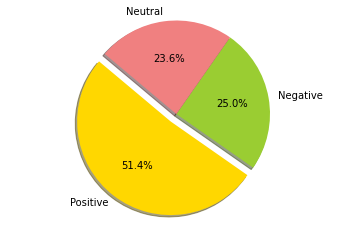

In [ ]:
#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

#Text Preprocessing and Building Corpus

In [ ]:
# Preprocessing
nltk.download('stopwords')
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

#Feature Extraction

In [ ]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

#Train-test split

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Classification of Reveiews

#Naive Bayes

In [ ]:
#Clasiification
# Fitting Naive Bayes
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)

In [ ]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

In [ ]:
cm_NB

array([[55, 42],
       [12, 91]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred_NB)

0.73

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



#Random Forest

In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
cm_RandFor = confusion_matrix(y_test, y_pred_rf)

In [ ]:
cm_RandFor

array([[87, 10],
       [46, 57]])

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.72

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.90      0.76        97
           1       0.85      0.55      0.67       103

    accuracy                           0.72       200
   macro avg       0.75      0.73      0.71       200
weighted avg       0.76      0.72      0.71       200



#Support Vector Machine

In [ ]:
#Support Vector Classifier
SVC_classifier = SVC(kernel = 'rbf')
SVC_classifier.fit(X_train, y_train)
y_pred_SVC = SVC_classifier.predict(X_test)

In [ ]:
cm_SVC = confusion_matrix(y_test, y_pred_SVC)

In [ ]:
cm_SVC

array([[90,  7],
       [46, 57]])

In [ ]:
accuracy_score(y_test, y_pred_SVC)

0.735

In [ ]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77        97
           1       0.89      0.55      0.68       103

    accuracy                           0.73       200
   macro avg       0.78      0.74      0.73       200
weighted avg       0.78      0.73      0.73       200

